# 【吴恩达Deeplearning.ai笔记一】直观解释逻辑回归

**深度学习（Deep Learning）**是**机器学习（Machine Learning）**的一大分支，它试图使用包含复杂结构或由多重非线性变换构成的多个处理层对数据进行高层抽象的算法.


**逻辑回归（Logistic Regression，也译作“对数几率回归”）**是离散选择法模型之一，属于多重变量分析范畴，是社会学、生物统计学、临床、数量心理学、计量经济学、市场营销等统计实证分析的常用方法。

## 1.符号约定

<img align="left" src="figures/logistic1.jpg">

逻辑回归一般用于**二分类（Binary Classification）**问题中，给定一些输入，输出结果是离散值。例如用逻辑回归实现一个猫分类器，输入一张图片 x ，预测图片是否为猫，输出该图片中存在猫的概率结果 y。

图片是一类非结构化的数据。在计算机中，一张图片以RGB编码方式存储时，是将它以红、绿、蓝为三基色，以每个像素点上三种颜色的十六进制颜色码进行编码，形成一个包含三个**信道（Channel）**，各信道大小和图片的大小相同的矩阵。例如图中的猫图大小为  ``64*64``，那么表示为矩阵后的每个信道大小即为 ``64*64``.

**模式识别（Pattern Recognition）**以及机器学习中，处理的各种类型的数据都需要用一些特征向量来表示。为了将上例中的图片表示为一个特征向量 x，将每三个信道中三种颜色的值进行拆分重塑，形成维数为 ``nx = 64*64*3=12288``的特征向量：
<img align="right" src="figures/logistic2.jpg">


<img align="left" src="figures/logistic3.jpg">

<img align="left" src="figures/logistic4.jpg">

## 2. 逻辑回归

### ``逻辑回归是一种用于解决监督学习（Supervised Learning）问题的学习算法，进行逻辑回归的目的，是使训练数据的标签值与预测出来的值之间的误差最小化``。

<img align="left" src="figures/logistic5.jpg">

<img align="left" src="figures/logistic6.jpg">

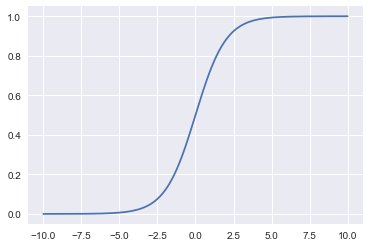

In [3]:
# 可以画出其函数图像
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns;sns.set()

z = np.linspace(-10, 10, 1000)
theta = 1 / (1 + np.exp(-z))

plt.plot(z, theta)

其函数图像如上图所示.

### 可以用sigmoid函数来约束$\hat{y}$的值域

<img align="left" src="figures/logistic8.jpg">

## 3. 成本函数

<img align="left" src="figures/logistic9.jpg">

但在逻辑回归中一般不使用这个损失函数，因为在训练参数过程中，使用这个损失函数将得到一个非凸函数，最终将存在很多局部最优解，这种情况下使用**梯度下降（Gradient Descent）**将无法获得最优解。对逻辑回归模型，希望满足条件概率：

<img align="left" src="figures/logistic10.jpg">

p(y|x)需要最大化，而损失函数需要最小化，所以在原来的式子中填上负号，就可以将它作为一个损失函数。在上式右边添加一个负号，就推导出了逻辑回归中用到的**log损失函数**，表达式为：
<img align="left" src="figures/logistic11.jpg">

对m个训练样本整体的成本函数，可以使用数理统计中的极大似然估计法（Maximum Likelihood Estimation）推导出来的。

假设所有训练样本独立同分布，则联合概率为所有样本概率的乘积:

<img align="left" src="figures/logistic12.jpg">

## 4.梯度下降

### ``想找到使成本函数的值最小的参数 w和b的值，一般采用梯度下降法。标量场中某一点上的梯度指向标量场增长最快的方向，梯度的长度是这个最大的变化率``。
<img align="left" src="figures/logistic13.jpg">

在空间坐标中以``w,b``为轴画出损失函数``J(w,b)``的三维图像，可知这个函数为一个凸函数。为了找到合适的参数，先将w和b赋一个初始值，正如图中的小红点。

在逻辑回归中，几乎任何初始化方法都有效，通常将参数初始化为零。随机初始化也起作用，但通常不会在逻辑回归中这样做，因为这个成本函数是凸的，无论初始化的值是多少，总会到达同一个点或大致相同的点。

梯度下降就是从起始点开始，试图在最陡峭的下降方向下坡，以便尽可能快地下坡到达最低点，这个下坡的方向便是此点的梯度值。

<img align="left" src="figures/logistic14.jpg">

### **在二维图像中来看，顺着导数的方向，下降速度最快，用数学公式表达即是**：
<img align="left" src="figures/logistic15.jpg">